# ML Regressin for California Housing Prices

## Import dependency

In [2]:
import pandas as pd
import numpy as np

## Data preparation

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.columns.str.lower().str.replace(' ', '_')

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['ocean_proximity']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [9]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## EDA

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']
5



In [11]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

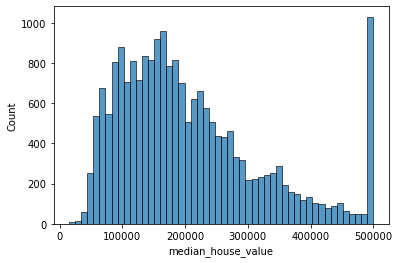

In [14]:
sns.histplot(df.median_house_value, bins=50)

In [15]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Setting validation framework

In [16]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [17]:
n

20640

### shuffle the index

In [18]:
n_train, n_train, n_val

(12384, 12384, 4128)

In [19]:
idx = np.arange(n)

In [20]:
np.random.seed(42)
np.random.shuffle(idx)

In [21]:
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [22]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [23]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,inland
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,inland
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,near_bay
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1h_ocean
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,near_ocean
...,...,...,...,...,...,...,...,...,...,...
10292,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0,<1h_ocean
16722,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0,<1h_ocean
11730,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0,inland
5993,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0,inland


In [24]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,inland
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,inland
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,near_bay
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1h_ocean
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,near_ocean


In [25]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test= df_test.reset_index(drop=True)

In [27]:
df['population'].median()

1166.0

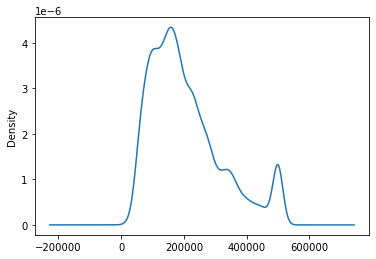

In [28]:
# Look at the median_house_value variable. Does it have a long tail?
df.median_house_value.plot.density()
plt.show()  

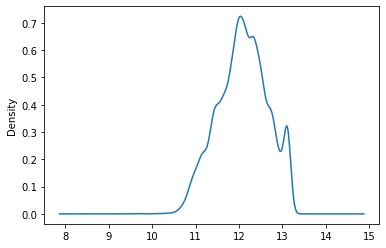

In [29]:
# Look at the log transformed median house value variable
np.log1p(df.median_house_value).plot.density()
plt.show()

In [30]:
features = ['latitude', 'longitude', 'housing_median_age',
            'total_rooms', 'total_bedrooms', 'population',
            'households', 'median_income']
target = 'median_house_value'

## Question 1
### Find a features with missing values.
### How many missing values does it have?

In [31]:
na_per_feature = df[features].isna().sum()
print(na_per_feature[na_per_feature > 0])  # total_bedrooms has 207 na values

total_bedrooms    207
dtype: int64


## Question 2
### What's the median (50% percentile) for the population variable?

In [32]:
population_median = np.median(df.population)
print(population_median)  # 1'166

1166.0


In [34]:
# %% Perform the train-test split

# Shuffle the initial dataset, use seed 42
np.random.seed(42)
df = df.sample(frac=1).reset_index()

n = len(df)
n_val = int(n * 0.2)  # Validation size
n_test = int(n * 0.2)  # Test size
n_train = n - n_val - n_test  # Train size

# Performing the train-test split
df_train = df.iloc[:n_train][features]
df_val = df.iloc[n_train:n_train + n_val][features]
df_test = df.iloc[n_train + n_val:][features]

y_train = df.iloc[:n_train][target]
y_val = df.iloc[n_train:n_train + n_val][target]
y_test = df.iloc[n_train + n_val:][target]